In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Zomato data .csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [3]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [4]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# Convert data type of "rate" column

In [6]:
## Define a function to convert
def handling_rate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df["rate"]=df["rate"].apply(handling_rate)

In [7]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [8]:
df.rename(columns={'listed_in(type)':'Type', 'approx_cost(for two people)':'Cost for 2 ppl(apx.)'}, inplace=True)

In [9]:
df

,name,online_order,book_table,rate,votes,Cost for 2 ppl(apx.),Type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


# Most popular type of restaurant

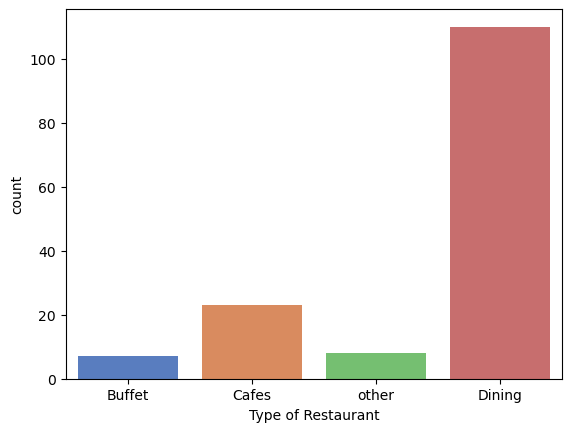

In [10]:
sns.countplot(x=df['Type'], palette='muted')
plt.xlabel("Type of Restaurant")
plt.show()

In [11]:
#Conclusion: Dining is the most popular and widespread type of restaurant

# Votes each type of restaurant received from customers

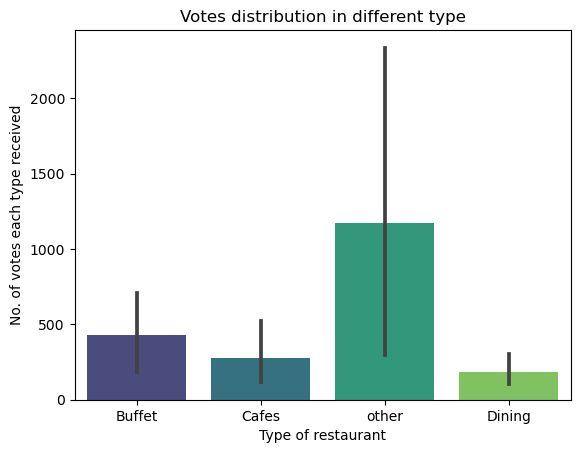

In [12]:
sns.barplot(x=df["Type"], y=df["votes"], data=df, palette='viridis')
plt.xlabel("Type of restaurant")
plt.ylabel("No. of votes each type received")
plt.title("Votes distribution in different type")
plt.show()

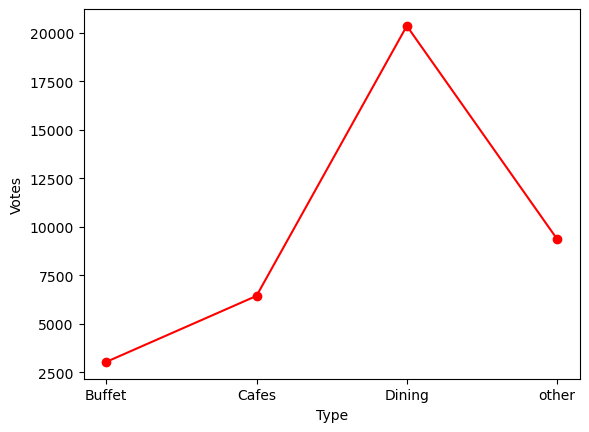

In [13]:
#Line plot would be more suitable to visualize here
df5=df.groupby(['Type'])['votes'].sum()
result=pd.DataFrame({'votes':df5})
plt.plot(result, c='red', marker='o')
plt.xlabel('Type')
plt.ylabel('Votes')
plt.show()

In [14]:
#Conclusion- Dining restaurants have received max votes

# Ratings that the majority of restaurants have received

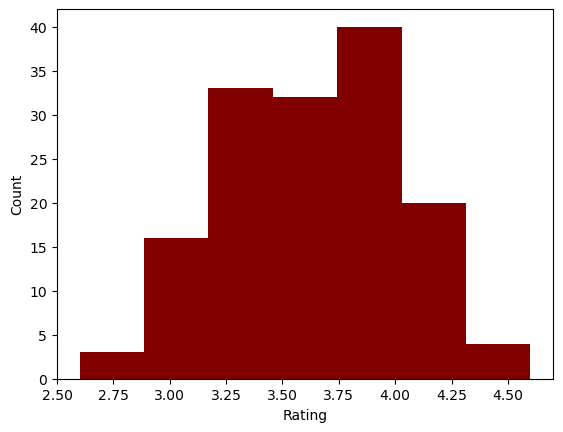

In [15]:
plt.hist(df["rate"], bins=7, color="maroon")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [16]:
#Conclusion- Majority of restaurants have received 3.75 to 4.00 ratings

# Couple's average spending on each order

In [17]:
df

,name,online_order,book_table,rate,votes,Cost for 2 ppl(apx.),Type
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [22]:
#On online order
df6=df[df["online_order"]=='Yes']["Cost for 2 ppl(apx.)"].mean()
df6

510.3448275862069

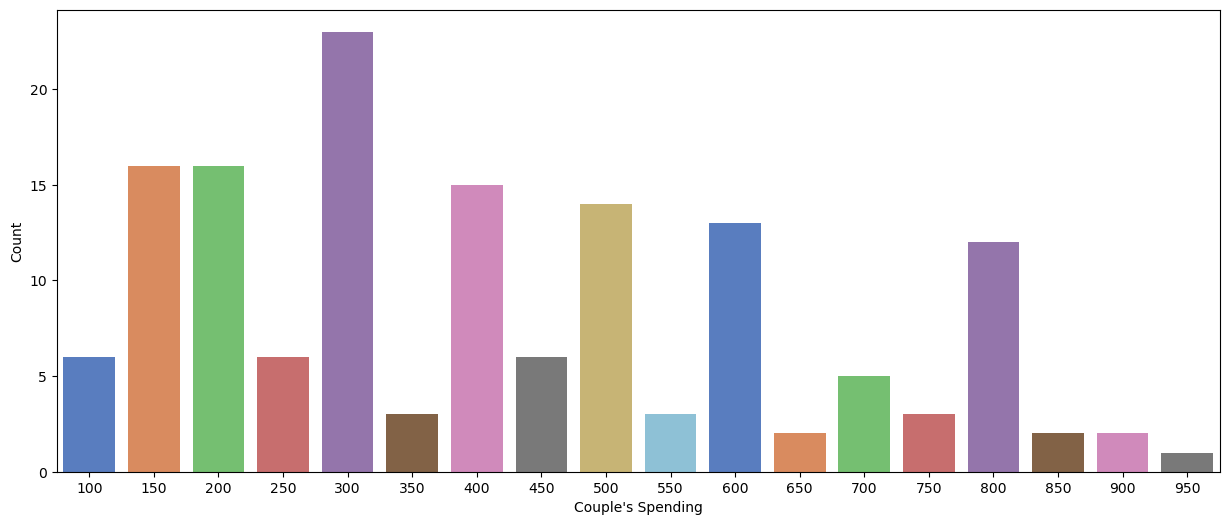

In [25]:
#In general
plt.figure(figsize=(15,6))
sns.countplot(x=df["Cost for 2 ppl(apx.)"], palette="muted")
plt.xlabel("Couple's Spending")
plt.ylabel("Count")
plt.show()

In [29]:
s= df['Cost for 2 ppl(apx.)'].value_counts()
s

300    23
200    16
150    16
400    15
500    14
600    13
800    12
100     6
450     6
250     6
700     5
550     3
750     3
350     3
900     2
850     2
650     2
950     1
Name: Cost for 2 ppl(apx.), dtype: int64

In [30]:
#Conclusion- Most couple order in the range of 300 rupees

# More rated (more aware users)- Online vs Offline

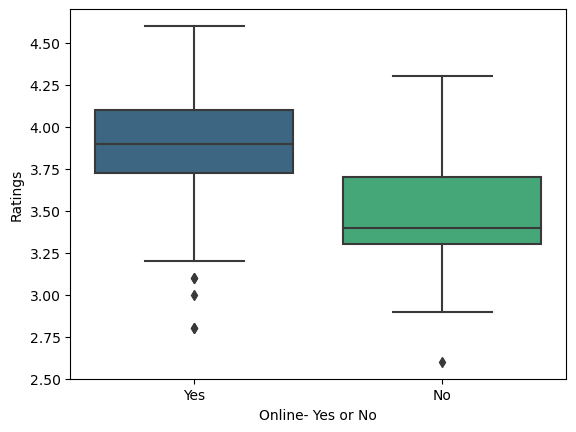

In [32]:
sns.boxplot(x=df['online_order'], y=df['rate'], palette='viridis')
plt.xlabel("Online- Yes or No")
plt.ylabel("Ratings")
plt.show()

In [33]:
#Conclusion- Users who order online rate restaurants more as compared to those who order offline

# Type of restaurant with more offline orders

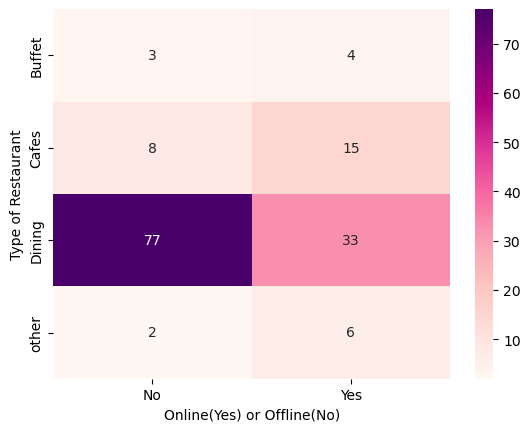

In [39]:
df7=df.pivot_table(index='Type', columns='online_order', fill_value=0, aggfunc='size')
sns.heatmap(df7, cmap='RdPu', fmt='d', annot=True)
plt.xlabel('Online(Yes) or Offline(No)')
plt.ylabel('Type of Restaurant')
plt.show()

In [44]:
## Conclusion- Dining type restaurant has received most orders offline, but at the same time cafes received mostly online orders
 